In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
excel_file = 'SupplyChainEmissionFactorsforUSIndustriesCommodities.xlsx'  
years = range(2010, 2017)

In [3]:
years[0]

2010

In [4]:
df_1 = pd.read_excel(excel_file, sheet_name=f'{years[0]}_Detail_Commodity')
df_1.head()

,Commodity Code,Commodity Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.398,0.073,0.470,NaN,4,3,1,4,1
1,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1
2,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,3,1,4,1
3,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,NaN,3,3,1,3,1
4,1111B0,"Fresh wheat, corn, rice, and other grains",carbon dioxide,"kg/2018 USD, purchaser price",0.659,0.081,0.740,NaN,4,3,1,4,1


In [5]:
df_2 = pd.read_excel(excel_file, sheet_name=f'{years[0]}_Detail_Industry')
df_2.head()

,Industry Code,Industry Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
0,1111A0,Oilseed farming,carbon dioxide,"kg/2018 USD, purchaser price",0.414,0.073,0.487,NaN,4,3,1,4,1
1,1111A0,Oilseed farming,methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1
2,1111A0,Oilseed farming,nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,3,1,4,1
3,1111A0,Oilseed farming,other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,NaN,3,3,1,3,1
4,1111B0,Grain farming,carbon dioxide,"kg/2018 USD, purchaser price",0.680,0.082,0.762,NaN,4,3,1,4,1


In [6]:
all_data = []

for year in years:
    try:
        df_com = pd.read_excel(excel_file, sheet_name=f'{year}_Detail_Commodity')
        df_ind = pd.read_excel(excel_file, sheet_name=f'{year}_Detail_Industry')
        
        df_com['Source'] = 'Commodity'
        df_ind['Source'] = 'Industry'
        df_com['Year'] = df_ind['Year'] = year
        
        df_com.columns = df_com.columns.str.strip()
        df_ind.columns = df_ind.columns.str.strip()

        df_com.rename(columns={
            'Commodity Code': 'Code',
            'Commodity Name': 'Name'
        }, inplace=True)
        
        df_ind.rename(columns={
            'Industry Code': 'Code',
            'Industry Name': 'Name'
        }, inplace=True)
        
        all_data.append(pd.concat([df_com, df_ind], ignore_index=True))
        
    except Exception as e:
        print(f"Error processing year {year}: {e}")

In [7]:
all_data[3]

,Code,Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source,Year
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.373,0.072,0.444,NaN,4,3,1,4,1,Commodity,2013
1,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1,Commodity,2013
2,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,3,1,4,1,Commodity,2013
3,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,NaN,3,3,1,4,1,Commodity,2013
4,1111B0,"Fresh wheat, corn, rice, and other grains",carbon dioxide,"kg/2018 USD, purchaser price",0.722,0.079,0.801,NaN,4,3,1,4,1,Commodity,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3151,813B00,"Civic, social, professional, and similar organ...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.008,0.000,0.008,NaN,4,3,1,5,1,Industry,2013
3152,814000,Private households,carbon dioxide,"kg/2018 USD, purchaser price",0.000,0.000,0.000,NaN,4,3,1,5,1,Industry,2013
3153,814000,Private households,methane,"kg/2018 USD, purchaser price",0.000,0.000,0.000,NaN,4,3,1,5,1,Industry,2013
3154,814000,Private households,nitrous oxide,"kg/2018 USD, purchaser price",0.000,0.000,0.000,NaN,4,3,1,5,1,Industry,2013


In [8]:
len(all_data)

7

In [9]:
df = pd.concat(all_data, ignore_index=True)
df.head()

,Code,Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source,Year
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.398,0.073,0.470,NaN,4,3,1,4,1,Commodity,2010
1,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1,Commodity,2010
2,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,3,1,4,1,Commodity,2010
3,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,NaN,3,3,1,3,1,Commodity,2010
4,1111B0,"Fresh wheat, corn, rice, and other grains",carbon dioxide,"kg/2018 USD, purchaser price",0.659,0.081,0.740,NaN,4,3,1,4,1,Commodity,2010


In [10]:
len(df)

22092

In [11]:
df.columns # Checking columns

Index(['Code', 'Name', 'Substance', 'Unit',
       'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'Supply Chain Emission Factors with Margins', 'Unnamed: 7',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins', 'Source', 'Year'],
      dtype='object')

In [12]:
df.isnull().sum()

Code                                                          0
Name                                                          0
Substance                                                     0
Unit                                                          0
Supply Chain Emission Factors without Margins                 0
Margins of Supply Chain Emission Factors                      0
Supply Chain Emission Factors with Margins                    0
Unnamed: 7                                                22092
DQ ReliabilityScore of Factors without Margins                0
DQ TemporalCorrelation of Factors without Margins             0
DQ GeographicalCorrelation of Factors without Margins         0
DQ TechnologicalCorrelation of Factors without Margins        0
DQ DataCollection of Factors without Margins                  0
Source                                                        0
Year                                                          0
dtype: int64

In [13]:
# As there is no data avaialble in Unnamed coulmn so we will drop the column
df.drop(columns=['Unnamed: 7'],inplace=True)

In [14]:
df.columns

Index(['Code', 'Name', 'Substance', 'Unit',
       'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'Supply Chain Emission Factors with Margins',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins', 'Source', 'Year'],
      dtype='object')

In [15]:
print(df.info())   # Checking data types and non-null counts 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22092 entries, 0 to 22091
Data columns (total 14 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Code                                                    22092 non-null  object 
 1   Name                                                    22092 non-null  object 
 2   Substance                                               22092 non-null  object 
 3   Unit                                                    22092 non-null  object 
 4   Supply Chain Emission Factors without Margins           22092 non-null  float64
 5   Margins of Supply Chain Emission Factors                22092 non-null  float64
 6   Supply Chain Emission Factors with Margins              22092 non-null  float64
 7   DQ ReliabilityScore of Factors without Margins          22092 non-null  int64  
 8   DQ TemporalCorrelation of Factors wi

In [16]:
df.describe().T # Checking summary statistics 

,count,mean,std,min,25%,50%,75%,max
Supply Chain Emission Factors without Margins,22092.0,0.084807,0.267039,0.0,0.0,0.002,0.044,7.228
Margins of Supply Chain Emission Factors,22092.0,0.012857,0.078720,0.0,0.0,0.000,0.000,3.349
Supply Chain Emission Factors with Margins,22092.0,0.097681,0.288992,0.0,0.0,0.003,0.052,7.290
DQ ReliabilityScore of Factors without Margins,22092.0,3.308030,0.499643,2.0,3.0,3.000,4.000,4.000
DQ TemporalCorrelation of Factors without Margins,22092.0,2.571429,0.494883,2.0,2.0,3.000,3.000,3.000
DQ GeographicalCorrelation of Factors without Margins,22092.0,1.000000,0.000000,1.0,1.0,1.000,1.000,1.000
DQ TechnologicalCorrelation of Factors without Margins,22092.0,2.632129,1.135661,1.0,1.0,3.000,3.000,5.000
DQ DataCollection of Factors without Margins,22092.0,1.000000,0.000000,1.0,1.0,1.000,1.000,1.000
Year,22092.0,2013.000000,2.000045,2010.0,2011.0,2013.000,2015.000,2016.000


In [17]:
df.isnull().sum() # Checking for null values in each column 

Code                                                      0
Name                                                      0
Substance                                                 0
Unit                                                      0
Supply Chain Emission Factors without Margins             0
Margins of Supply Chain Emission Factors                  0
Supply Chain Emission Factors with Margins                0
DQ ReliabilityScore of Factors without Margins            0
DQ TemporalCorrelation of Factors without Margins         0
DQ GeographicalCorrelation of Factors without Margins     0
DQ TechnologicalCorrelation of Factors without Margins    0
DQ DataCollection of Factors without Margins              0
Source                                                    0
Year                                                      0
dtype: int64

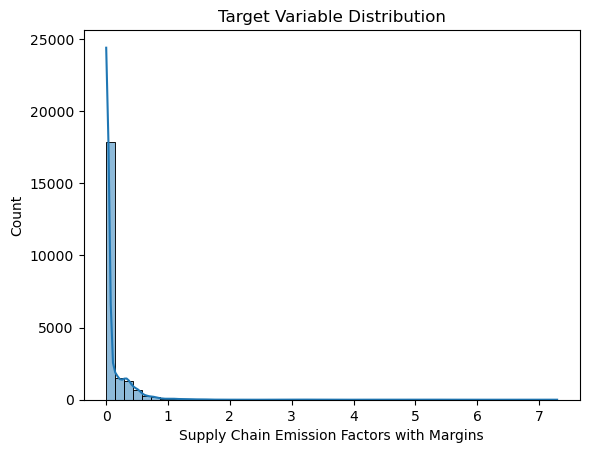

In [18]:
# Visualize distribution
sns.histplot(df['Supply Chain Emission Factors with Margins'], bins=50, kde=True)
plt.title('Target Variable Distribution')
plt.show()

In [19]:
# Check categorical variables
print(df['Substance'].value_counts())

Substance
carbon dioxide    5523
methane           5523
nitrous oxide     5523
other GHGs        5523
Name: count, dtype: int64


In [20]:
print(df['Unit'].value_counts()) # Checking unique values in 'Unit' with count 

Unit
kg/2018 USD, purchaser price         16569
kg CO2e/2018 USD, purchaser price     5523
Name: count, dtype: int64


In [21]:
print(df['Unit'].unique()) # Checking unique values in 'Unit'

['kg/2018 USD, purchaser price' 'kg CO2e/2018 USD, purchaser price']


In [22]:
print(df['Source'].value_counts()) # Checking unique values in 'Source' with count 

Source
Industry     11060
Commodity    11032
Name: count, dtype: int64


In [23]:
df['Substance'].unique() # Checking unique values in 'Substance' 

array(['carbon dioxide', 'methane', 'nitrous oxide', 'other GHGs'],
      dtype=object)

In [24]:
Q1 = df["Supply Chain Emission Factors with Margins"].quantile(0.25)
Q3 = df["Supply Chain Emission Factors with Margins"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[
    (df["Supply Chain Emission Factors with Margins"] >= lower_bound)
    & (df["Supply Chain Emission Factors with Margins"] <= upper_bound)
]


In [25]:
substance_map={'carbon dioxide':0, 'methane':1, 'nitrous oxide':2, 'other GHGs':3} # Mapping substances to integers 

In [26]:
df['Substance']=df['Substance'].map(substance_map) 

In [27]:
df['Substance'].unique() # Checking unique values in 'Substance' 

array([1, 2, 3, 0], dtype=int64)

In [28]:
print(df['Unit'].unique()) # Checking unique values in 'Unit' 

['kg/2018 USD, purchaser price' 'kg CO2e/2018 USD, purchaser price']


In [29]:
unit_map={'kg/2018 USD, purchaser price':0, 'kg CO2e/2018 USD, purchaser price':1} # Mapping units to integers 

In [30]:
df['Unit']=df['Unit'].map(unit_map)

In [31]:
print(df['Unit'].unique()) # Checking unique values in 'Unit' 

[0 1]


In [32]:
print(df['Source'].unique()) # Checking unique values in 'Source' 

['Commodity' 'Industry']


In [33]:
source_map={'Commodity':0, 'Industry':1} # Mapping sources to integers 

In [34]:
df['Source']=df['Source'].map(source_map)   # applying the mapping to 'Source' column 

In [35]:
print(df['Source'].unique()) # Checking unique values in 'Source' 

[0 1]


In [36]:
df.info() # Checking data types and non-null counts after mapping 

<class 'pandas.core.frame.DataFrame'>
Index: 17639 entries, 1 to 22091
Data columns (total 14 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Code                                                    17639 non-null  object 
 1   Name                                                    17639 non-null  object 
 2   Substance                                               17639 non-null  int64  
 3   Unit                                                    17639 non-null  int64  
 4   Supply Chain Emission Factors without Margins           17639 non-null  float64
 5   Margins of Supply Chain Emission Factors                17639 non-null  float64
 6   Supply Chain Emission Factors with Margins              17639 non-null  float64
 7   DQ ReliabilityScore of Factors without Margins          17639 non-null  int64  
 8   DQ TemporalCorrelation of Factors without

In [37]:
df.Code.unique() # Checking unique values in 'Code' df['Code']

array(['1111A0', '1111B0', '111200', '111300', '111400', '111900',
       '112120', '1121A0', '112300', '112A00', '113000', '114000',
       '115000', '211000', '212100', '212230', '2122A0', '212310',
       '2123A0', '213111', '21311A', '221100', '221200', '221300',
       '230301', '230302', '233210', '233230', '233240', '233262',
       '2332A0', '2332C0', '2332D0', '233411', '233412', '2334A0',
       '311111', '311119', '311210', '311221', '311224', '311225',
       '311230', '311300', '311410', '311420', '311513', '311514',
       '31151A', '311520', '311615', '31161A', '311700', '311810',
       '3118A0', '311910', '311920', '311930', '311940', '311990',
       '312110', '312120', '312130', '312140', '312200', '313100',
       '313200', '313300', '314110', '314120', '314900', '315000',
       '316000', '321100', '321200', '321910', '3219A0', '322110',
       '322120', '322130', '322210', '322220', '322230', '322291',
       '322299', '323110', '323120', '324110', '324121', '3241

In [38]:
df.Name.unique() # Checking unique values in 'Name' 

array(['Fresh soybeans, canola, flaxseeds, and other oilseeds',
       'Fresh wheat, corn, rice, and other grains',
       'Fresh vegetables, melons, and potatoes',
       'Fresh fruits and tree nuts',
       'Greenhouse crops, mushrooms, nurseries, and flowers',
       'Tobacco, cotton, sugarcane, peanuts, sugar beets, herbs and spices, and other crops',
       'Dairies', 'Cattle ranches and feedlots', 'Poultry farms',
       'Animal farms and aquaculture ponds (except cattle and poultry)',
       'Timber and raw forest products', 'Wild-caught fish and game',
       'Agriculture and forestry support', 'Unrefined oil and gas',
       'Coal', 'Copper, nickel, lead, and zinc',
       'Iron, gold, silver, and other metal ores', 'Dimensional stone',
       'Sand, gravel, clay, phosphate, other nonmetallic minerals',
       'Well drilling', 'Other support activities for mining',
       'Electricity', 'Natural gas',
       'Drinking water and wastewater treatment',
       'Nonresidential mai

In [39]:
len(df.Name.unique()) # Checking number of unique values in 'Name' 

713

In [40]:
top_emitters = df[['Name', 'Supply Chain Emission Factors with Margins']].groupby('Name').mean().sort_values(
    'Supply Chain Emission Factors with Margins', ascending=False).head(10) 

# Resetting index for better plotting
top_emitters = top_emitters.reset_index()

In [41]:
top_emitters

,Name,Supply Chain Emission Factors with Margins
0,Home refrigerators and freezers,0.034571
1,"Light gauge metal cans, boxes, and containers",0.034071
2,Household refrigerator and home freezer manufa...,0.033810
3,Printed circuit and electronic assembly,0.032750
4,Air and gas compressors,0.032000
5,Business support,0.030464
6,"Electronic capacitors, resistors, coils, trans...",0.030429
7,"Pet care, photofinishing, parking and other su...",0.030393
8,Internet publishing and broadcasting,0.030357
9,Advertising and public relations,0.030071


C:\Users\akhil\AppData\Local\Temp\ipykernel_28588\777911591.py:22: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout() # Adjust layout to prevent overlap


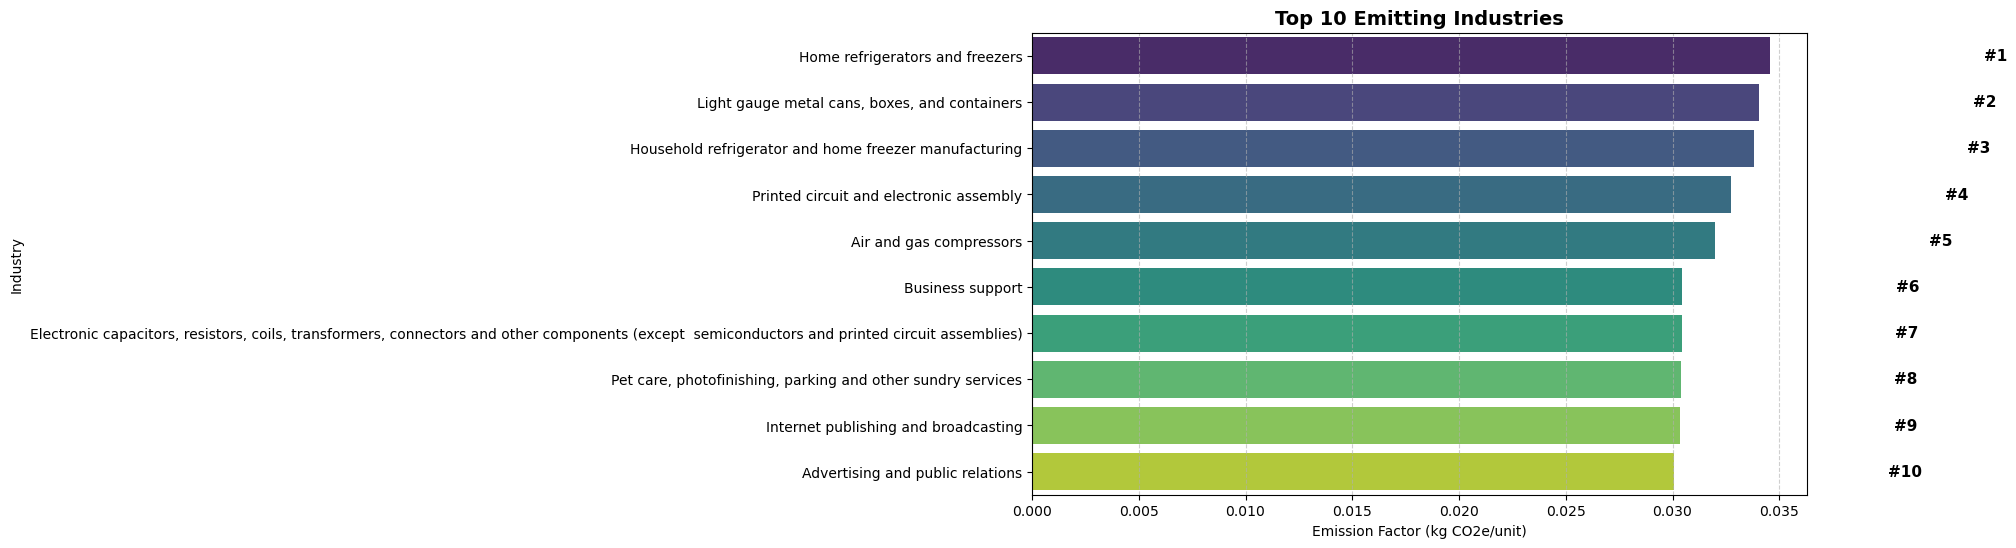

In [42]:
# Plotting the top 10 emitting industries


plt.figure(figsize=(10,6))
# Example: Top emitting industries (already grouped)
sns.barplot(
    x='Supply Chain Emission Factors with Margins',
    y='Name',
    data=top_emitters,
    hue='Name',
    palette='viridis'  # Use 'Blues', 'viridis', etc., for other color maps
)

# Add ranking labels (1, 2, 3...) next to bars
for i, (value, name) in enumerate(zip(top_emitters['Supply Chain Emission Factors with Margins'], top_emitters.index), start=1):
    plt.text(value + 0.01, i - 1, f'#{i}', va='center', fontsize=11, fontweight='bold', color='black')

plt.title('Top 10 Emitting Industries', fontsize=14, fontweight='bold') # Title of the plot 
plt.xlabel('Emission Factor (kg CO2e/unit)') # X-axis label
plt.ylabel('Industry') # Y-axis label
plt.grid(axis='x', linestyle='--', alpha=0.6) # Adding grid lines for better readability
plt.tight_layout() # Adjust layout to prevent overlap

plt.show()

In [43]:

df.drop(columns=['Name','Code','Year'], inplace=True) 

In [44]:
df.head(1)

,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source
1,1,0,0.001,0.001,0.002,4,3,1,1,1,0


In [45]:
df.shape

(17639, 11)

In [46]:
df.columns

Index(['Substance', 'Unit', 'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'Supply Chain Emission Factors with Margins',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins', 'Source'],
      dtype='object')

In [47]:
X = df.drop(columns=['Supply Chain Emission Factors with Margins']) # Feature set excluding the target variable
y = df['Supply Chain Emission Factors with Margins'] # Target variable 

In [48]:
X.head()

,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source
1,1,0,0.001,0.001,4,3,1,1,1,0
2,2,0,0.002,0.000,4,3,1,4,1,0
3,3,1,0.002,0.000,3,3,1,3,1,0
5,1,0,0.008,0.001,2,3,1,1,1,0
6,2,0,0.004,0.000,4,3,1,4,1,0


In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [50]:
y.head()

1    0.002
2    0.002
3    0.002
5    0.009
6    0.004
Name: Supply Chain Emission Factors with Margins, dtype: float64

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


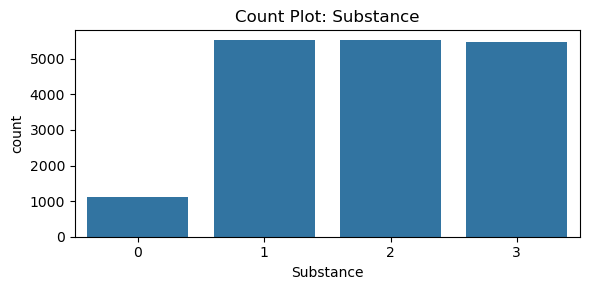

In [52]:
# Count plot for Substance
plt.figure(figsize=(6, 3))
sns.countplot(x=df["Substance"])
plt.title("Count Plot: Substance")
plt.xticks()
plt.tight_layout()
plt.show()

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MSE: 4.862086607782834e-08
R2 Score: 0.9998998796259918


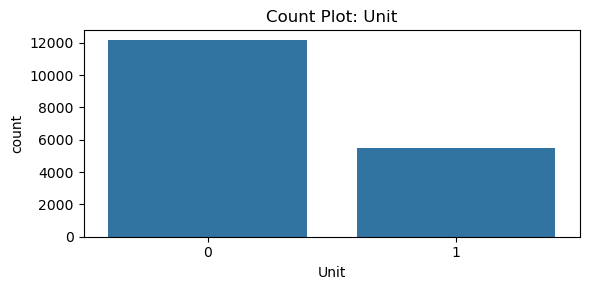

In [54]:
# Count plot for Unit
plt.figure(figsize=(6, 3))
sns.countplot(x=df["Unit"])
plt.title("Count Plot: Unit")
plt.tight_layout()
plt.show()


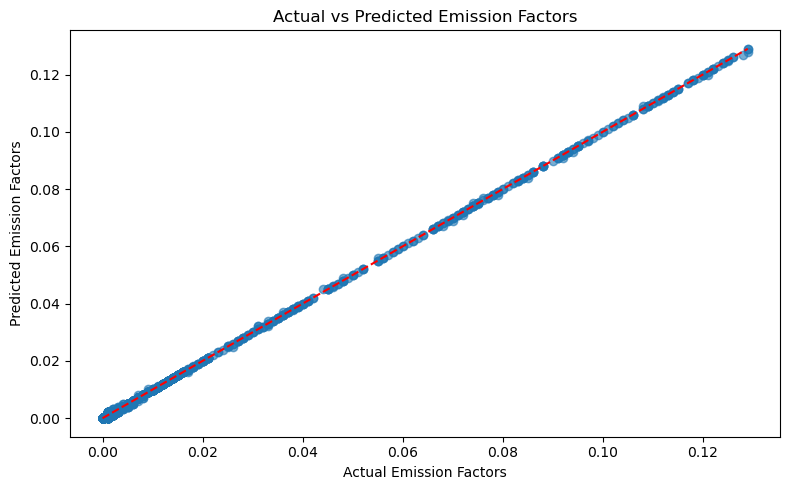

In [55]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Emission Factors")
plt.ylabel("Predicted Emission Factors")
plt.title("Actual vs Predicted Emission Factors")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.tight_layout()
plt.show()


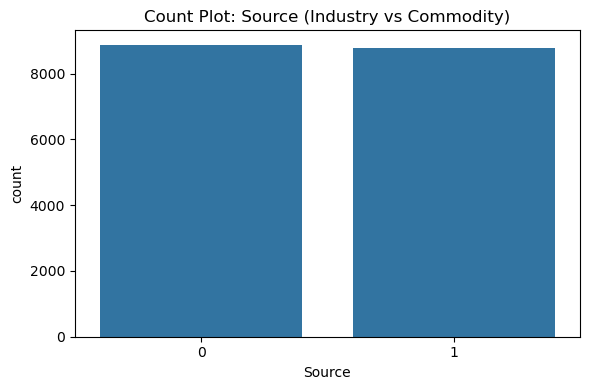

In [56]:
# Count plot for Source
plt.figure(figsize=(6, 4))
sns.countplot(x=df["Source"])
plt.title("Count Plot: Source (Industry vs Commodity)")
plt.tight_layout()
plt.show()

In [57]:
df.columns

Index(['Substance', 'Unit', 'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'Supply Chain Emission Factors with Margins',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins', 'Source'],
      dtype='object')

In [58]:
df.select_dtypes(include=np.number).corr() # Checking correlation between numerical features 

,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source
Substance,1.000000,0.817172,-0.327546,-0.234220,-0.350518,-0.047042,0.008330,NaN,0.549861,NaN,0.014810
Unit,0.817172,1.000000,0.019932,-0.085320,0.003575,-0.087616,0.002664,NaN,0.410156,NaN,0.004930
Supply Chain Emission Factors without Margins,-0.327546,0.019932,1.000000,0.242486,0.986034,-0.152773,-0.009454,NaN,0.133402,NaN,-0.018095
Margins of Supply Chain Emission Factors,-0.234220,-0.085320,0.242486,1.000000,0.400399,-0.058496,-0.006852,NaN,0.026177,NaN,-0.024767
Supply Chain Emission Factors with Margins,-0.350518,0.003575,0.986034,0.400399,1.000000,-0.154189,-0.009934,NaN,0.129389,NaN,-0.021166
DQ ReliabilityScore of Factors without Margins,-0.047042,-0.087616,-0.152773,-0.058496,-0.154189,1.000000,-0.023272,NaN,0.106554,NaN,-0.009726
DQ TemporalCorrelation of Factors without Margins,0.008330,0.002664,-0.009454,-0.006852,-0.009934,-0.023272,1.000000,NaN,-0.040106,NaN,-0.000353
DQ GeographicalCorrelation of Factors without Margins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DQ TechnologicalCorrelation of Factors without Margins,0.549861,0.410156,0.133402,0.026177,0.129389,0.106554,-0.040106,NaN,1.000000,NaN,0.028573
DQ DataCollection of Factors without Margins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
df.info() # Checking data types and non-null counts after mapping 

<class 'pandas.core.frame.DataFrame'>
Index: 17639 entries, 1 to 22091
Data columns (total 11 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Substance                                               17639 non-null  int64  
 1   Unit                                                    17639 non-null  int64  
 2   Supply Chain Emission Factors without Margins           17639 non-null  float64
 3   Margins of Supply Chain Emission Factors                17639 non-null  float64
 4   Supply Chain Emission Factors with Margins              17639 non-null  float64
 5   DQ ReliabilityScore of Factors without Margins          17639 non-null  int64  
 6   DQ TemporalCorrelation of Factors without Margins       17639 non-null  int64  
 7   DQ GeographicalCorrelation of Factors without Margins   17639 non-null  int64  
 8   DQ TechnologicalCorrelation of Factors wi

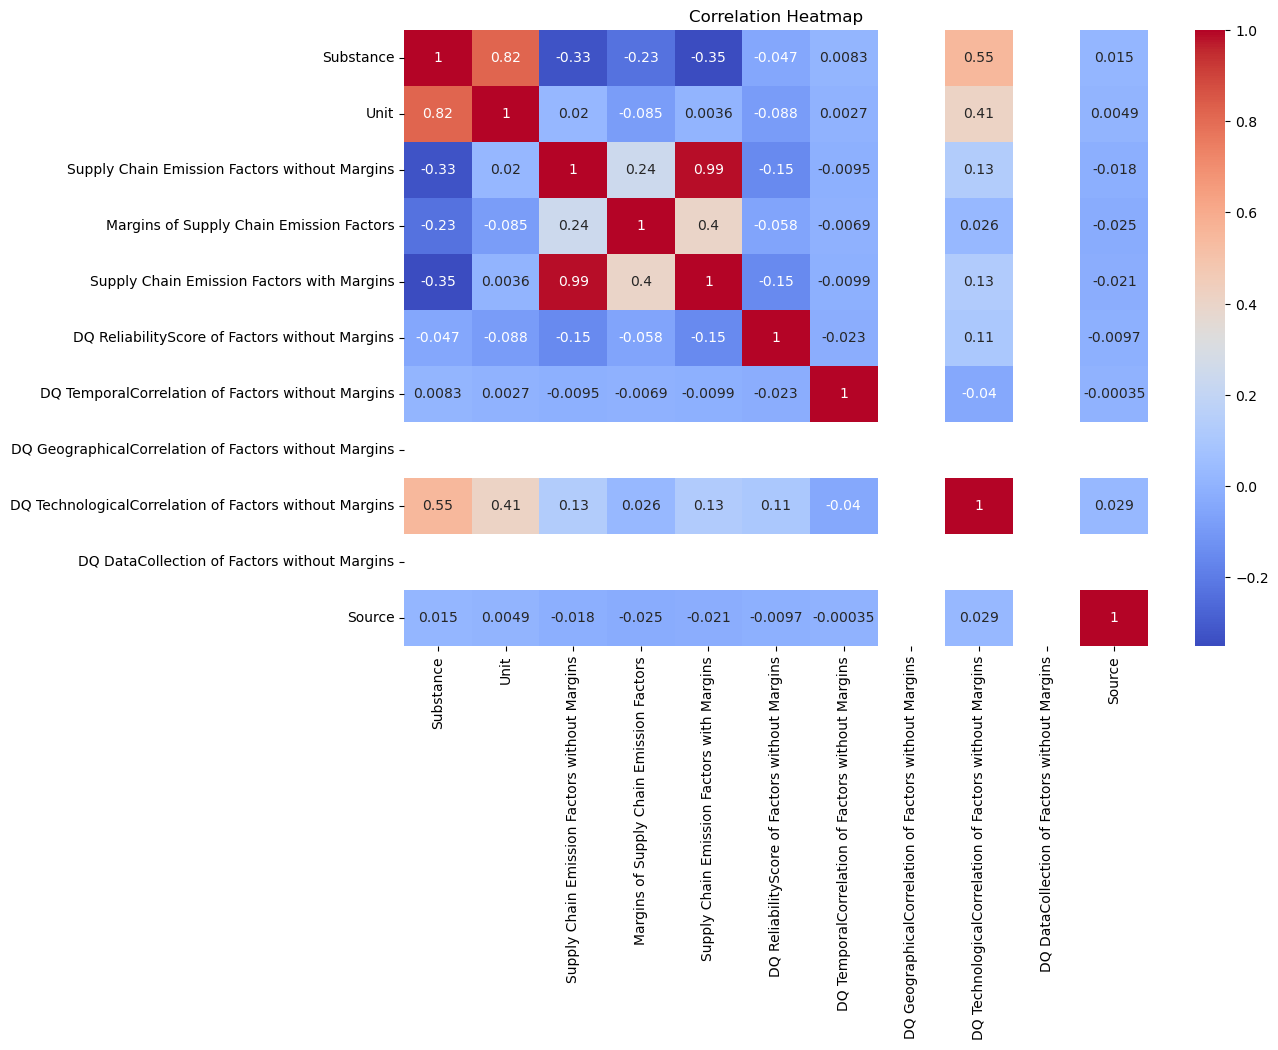

In [60]:
# Correlation matrix 
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()